In [ ]:
from notebooks import *

In [ ]:
load = Load()
recs = load.recs(
    # limit=30,  # XXX Faster dev
    datasets=[
        'peterson-field-guide',
    ],
)
display(df_summary(recs), recs[:5])

[03:11:00.529] Load.metadata:in
  len(recs): 535
  len(recs) per dataset: {peterson-field-guide: 535}


[                                                                                          ] | 0% Completed |  0.0s

[############################                                                              ] | 32% Completed |  0.1s

[########################################################################                  ] | 80% Completed |  0.2s

[##########################################################################################] | 100% Completed |  0.3s

[03:11:00.974] Load.metadata:out
  sum(duration_h): 3.05
  sum(samples_mb): 462.0
  sum(samples_n): 242449344
  n_species: 35


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path
dtype,object,category,category,object,float64,float64,int64,object,category,object,object
sizeof,44.4 KiB,8.1 KiB,8.4 KiB,37.2 KiB,8.4 KiB,8.4 KiB,8.4 KiB,46.2 KiB,8.6 KiB,64.0 KiB,66.1 KiB
len,535,535,535,535,535,535,535,535,535,535,535
count,535,535,535,535,535,535,535,535,535,535,535
nunique,1,35,35,35,440,440,440,535,35,535,535
mean,NaN,NaN,NaN,NaN,20.552,0.864,453176.344,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.785,0.369,193707.421,NaN,NaN,NaN,NaN
min,peterson-field-guide,SCQU,Scaled Quail,amecro,2.74,0.115,60480,43186571 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/amecro/audio/43215281 Caw (clear),peterson-field-guide/amecro/audio/43215281 Caw (clear).mp3
25%,peterson-field-guide,BOCH,Boreal Chickadee,bushti,14.70,0.617,323712,43217471 Chick-a-dee Call (mostly Dee notes),Boreal Chickadee - BOCH,peterson-field-guide/bushti/audio/43218221 Dzit Series & Dzit,peterson-field-guide/bushti/audio/43218221 Dzit Series & Dzit.mp3
50%,peterson-field-guide,CANW,Canyon Wren,herthr,19.90,0.837,438912,43219321 Female & Male Song duet,Canyon Wren - CANW,peterson-field-guide/herthr/audio/43222801 Seer,peterson-field-guide/herthr/audio/43222801 Seer.mp3


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path
387,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.1,0.509,266688,43186661 Chip-seer,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186661 Chip-seer,peterson-field-guide/scaqua/audio/43186661 Chip-seer.mp3
379,peterson-field-guide,SCQU,Scaled Quail,scaqua,32.2,1.350,710208,43186571 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186571 Song (Screech),peterson-field-guide/scaqua/audio/43186571 Song (Screech).mp3
380,peterson-field-guide,SCQU,Scaled Quail,scaqua,20.8,0.877,459648,43186581 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186581 Song (Screech),peterson-field-guide/scaqua/audio/43186581 Song (Screech).mp3
381,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.3,0.517,271296,43186591 Kuk-curr Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series.mp3
382,peterson-field-guide,SCQU,Scaled Quail,scaqua,19.7,0.831,435456,43186601 Kuk-curr Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186601 Kuk-curr Series,peterson-field-guide/scaqua/audio/43186601 Kuk-curr Series.mp3


In [ ]:
# Stats
(recs
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
        species=lambda df: df.species.cat.remove_unused_categories(),  # Else groupby includes all categories
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
    .dropna()
)

n  duration_h  samples_gb  samples_n
dataset              species                                       
peterson-field-guide SCQU     11       0.052       0.008    4160448
                     MONQ      9       0.052       0.008    4142016
                     WITU     13       0.087       0.013    6920064
                     OSPR      7       0.038       0.006    3002688
                     KILL     10       0.052       0.008    4142016
                     BEKI      7       0.036       0.005    2873664
                     AMCR     17       0.103       0.015    8194176
                     CORA     17       0.107       0.016    8485632
                     CACH     18       0.092       0.014    7335936
                     BCCH     19       0.082       0.012    6525504
                     BOCH     12       0.065       0.010    5183424
                     TUTI     26       0.144       0.021   11402496
                     BCTI     20       0.119       0.018    9476352
                     BUSH     12       0.050       0.007    3998016
                     RBNU     16       0.102       0.015    8095104
                     WBNU     17       0.082       0.012    6512832
                     BRCR     17       0.083       0.012    6582528
                     ROWR     13       0.086       0.013    6787584
                     CANW     15       0.068       0.010    5427648
                     HOWR     20       0.126       0.019   10019520
                     WIWR      9       0.091       0.013    7204608
                     SEWR     11       0.079       0.012    6274944
                     MAWR     20       0.141       0.021   11204928
                     CARW     19       0.098       0.014    7767360
                     BEWR     19       0.114       0.017    9060480
                     CACW     14       0.068       0.010    5369472
                     SWTH     15       0.091       0.013    7240320
                     HETH     18       0.119       0.018    9429696
                     AMRO     19       0.103       0.015    8199360
                     EUST     18       0.115       0.017    9146880
                     CEDW      7       0.036       0.005    2884608
                     OCWA     16       0.096       0.014    7609536
                     WIWA     15       0.092       0.014    7293312
                     WCSP     20       0.089       0.013    7036416
                     SOSP     19       0.094       0.014    7459776

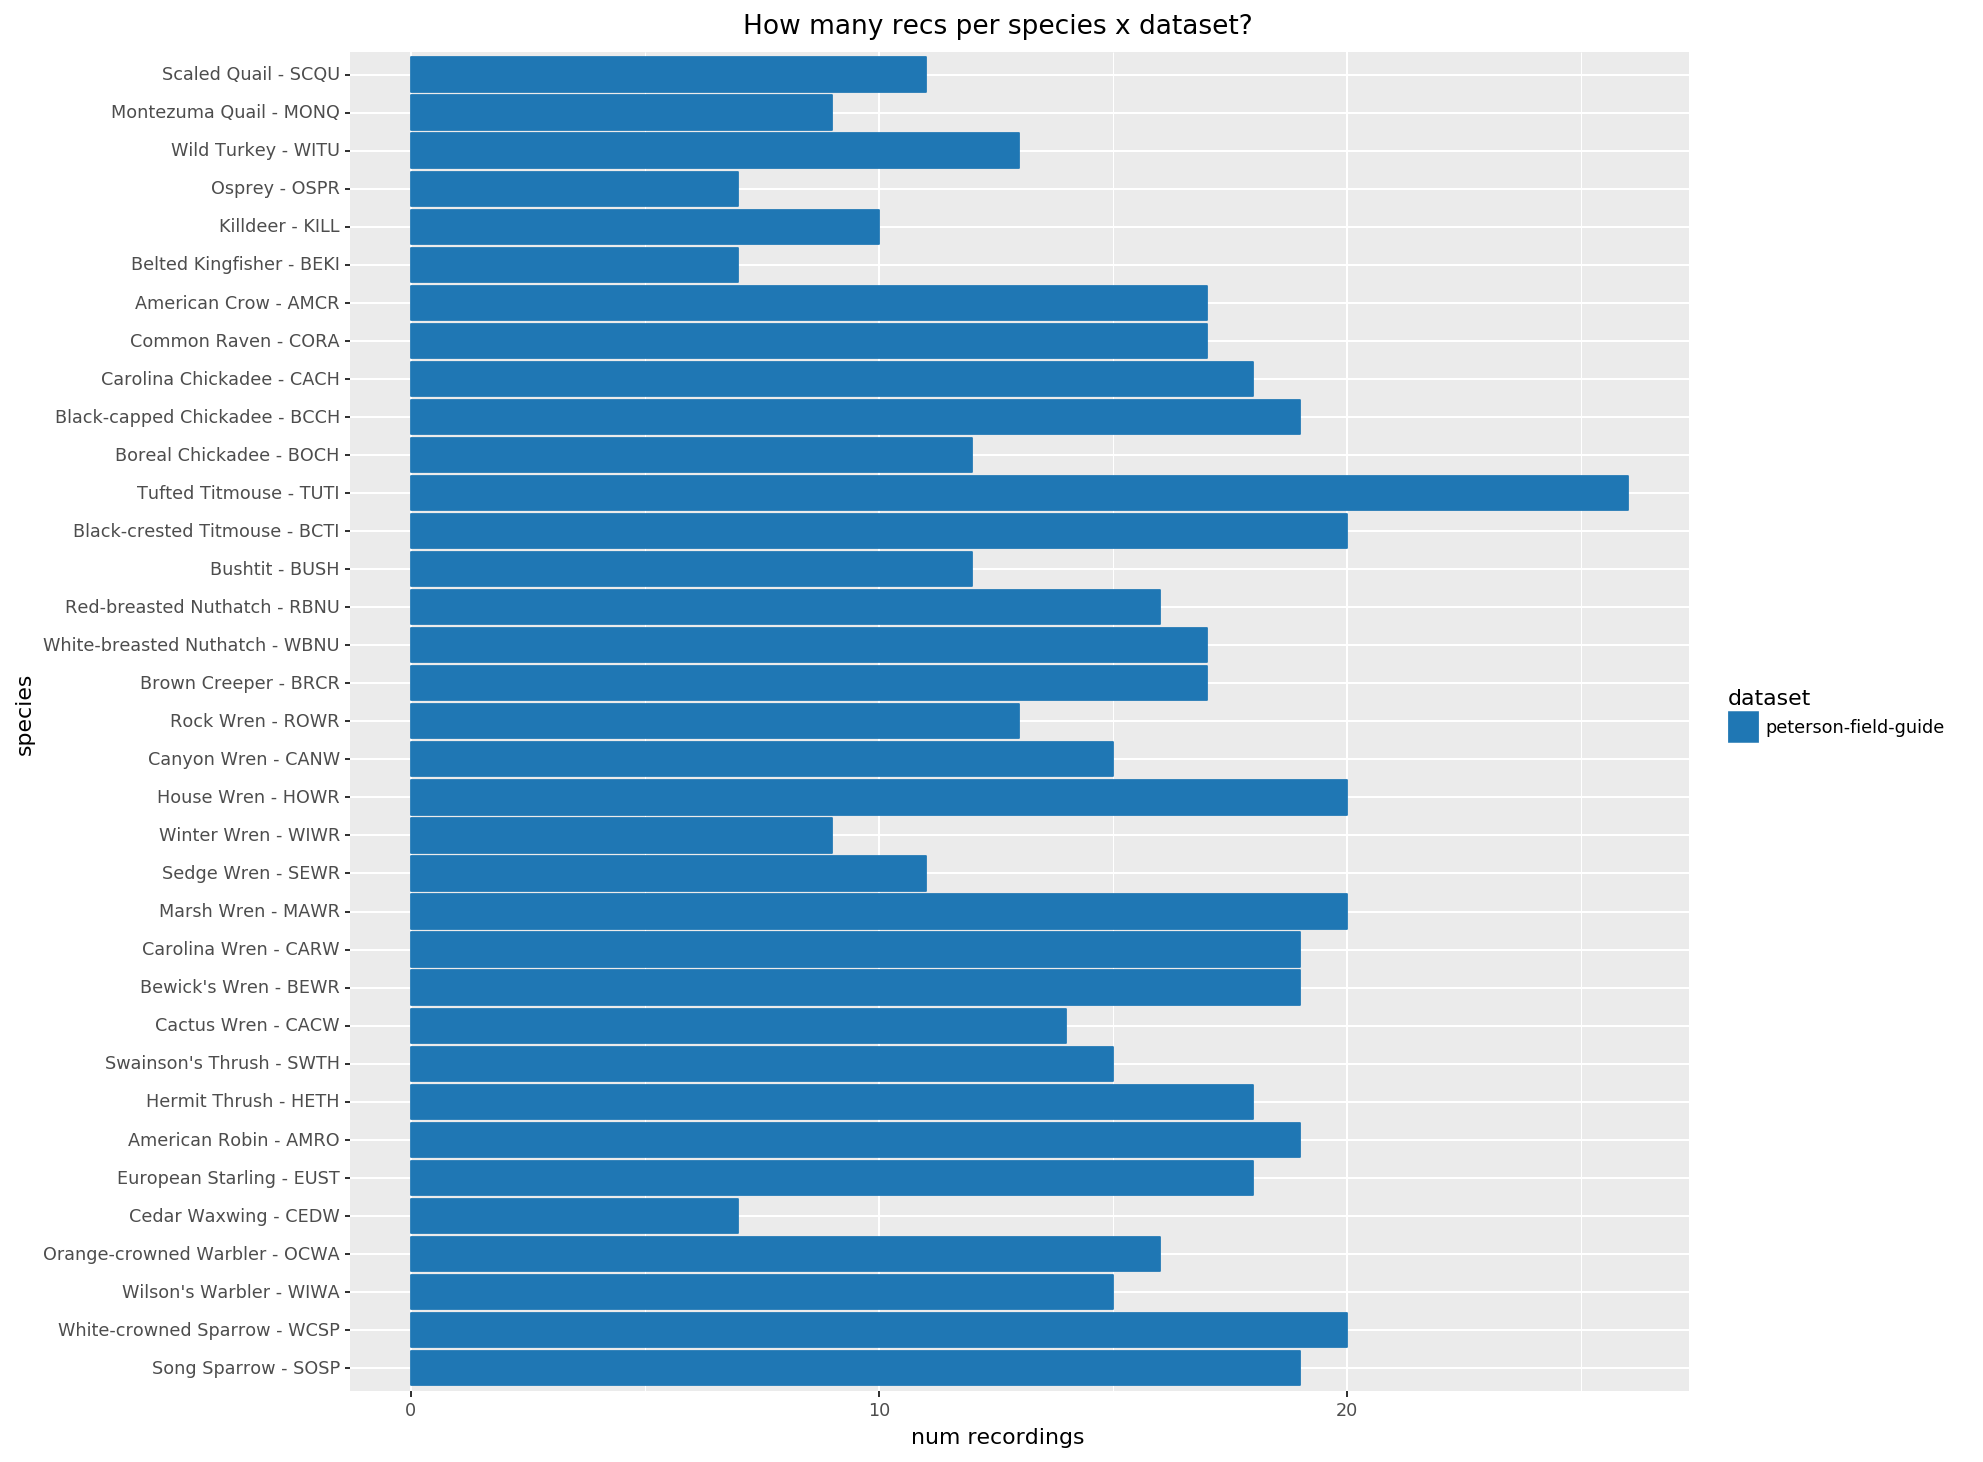

<ggplot: (-9223372029319527157)>

In [ ]:
(recs
    .assign(species=lambda df: df.species_longhand)
    .assign(n=1)
    .pipe(lambda df: df.append(
        pd.DataFrame([
            dict(species=species, dataset=dataset, n=0)
            for species in df.species.unique()
            for dataset in df.dataset.unique()
        ])
        .astype({'species': df.species.dtype})
    ))
    .groupby(['dataset', 'species'])['n'].sum().reset_index()
    .pipe(df_reverse_cat, 'species')
    .pipe(ggplot, aes(x='species', y='n', color='dataset', fill='dataset'))
    + coord_flip()
    + stat_identity(geom='bar', position=position_dodge())
    + ylab('num recordings')
    + scale_color_cmap_d(mpl.cm.tab10)
    + scale_fill_cmap_d(mpl.cm.tab10)
    + theme_figsize('square')
    + ggtitle('How many recs per species x dataset?')
)

In [ ]:
%%time
# Fit projection
from sp14.model import *

# k, n = 5,  6   # Faster dev
# k, n = 50,  60   # Faster dev
k, n = 500, 300  # Mem safe (~17m uncached for 6 configs)
# k, n = 500, 535  # Full [XXX Not mem safe] [len(peterson) is currently 535]
recs_train_projection = (recs
    [lambda df: df.dataset == 'peterson-field-guide']
    .pipe(sklearn.utils.shuffle, random_state=0)
    .sample(n, random_state=0)
)

projection = Projection(k=k)
projection.fit(recs_train_projection)

[03:11:02.966] Features.patches:in
  len(recs): 300
  len(recs) per dataset: {peterson-field-guide: 300}
  sum(duration_h): 1.69
  sum(samples_mb): 256.0
  sum(samples_n): 134041536
  (f, sum(t)): [[], 0]


[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[#                                                                                         ] | 1% Completed |  0.2s

[##                                                                                        ] | 2% Completed |  0.4s

[###                                                                                       ] | 3% Completed |  0.6s

[###                                                                                       ] | 3% Completed |  0.7s

[####                                                                                      ] | 5% Completed |  0.8s

[#####                                                                                     ] | 6% Completed |  1.0s

[#######                                                                                   ] | 7% Completed |  1.1s

[#######                                                                                   ] | 7% Completed |  1.3s

[########                                                                                  ] | 9% Completed |  1.4s

[#########                                                                                 ] | 10% Completed |  1.5s

[##########                                                                                ] | 11% Completed |  1.7s

[###########                                                                               ] | 13% Completed |  1.9s

[#############                                                                             ] | 14% Completed |  2.0s

[##############                                                                            ] | 15% Completed |  2.2s

[###############                                                                           ] | 17% Completed |  2.3s

[################                                                                          ] | 18% Completed |  2.4s

[#################                                                                         ] | 19% Completed |  2.5s

[##################                                                                        ] | 21% Completed |  2.6s

[#####################                                                                     ] | 23% Completed |  2.8s

[#####################                                                                     ] | 23% Completed |  2.9s

[######################                                                                    ] | 25% Completed |  3.0s

[######################                                                                    ] | 25% Completed |  3.2s

[#######################                                                                   ] | 26% Completed |  3.3s

[#######################                                                                   ] | 26% Completed |  3.4s

[########################                                                                  ] | 27% Completed |  3.6s

[##########################                                                                ] | 28% Completed |  3.8s

[###########################                                                               ] | 30% Completed |  3.9s

[###########################                                                               ] | 30% Completed |  4.0s

[############################                                                              ] | 31% Completed |  4.1s

[#############################                                                             ] | 32% Completed |  4.3s

[##############################                                                            ] | 34% Completed |  4.5s

[#################################                                                         ] | 36% Completed |  4.6s

[#################################                                                         ] | 36% Completed |  4.7s

[##################################                                                        ] | 38% Completed |  4.9s

[###################################                                                       ] | 39% Completed |  5.0s

[####################################                                                      ] | 40% Completed |  5.2s

[#####################################                                                     ] | 42% Completed |  5.3s

[#######################################                                                   ] | 43% Completed |  5.4s

[########################################                                                  ] | 44% Completed |  5.5s

[########################################                                                  ] | 44% Completed |  5.6s

[#########################################                                                 ] | 46% Completed |  5.8s

[#########################################                                                 ] | 46% Completed |  5.9s

[##########################################                                                ] | 47% Completed |  6.0s

[##########################################                                                ] | 47% Completed |  6.1s

[###########################################                                               ] | 48% Completed |  6.3s

[###########################################                                               ] | 48% Completed |  6.4s

[#############################################                                             ] | 50% Completed |  6.6s

[##############################################                                            ] | 51% Completed |  6.7s

[###############################################                                           ] | 52% Completed |  6.8s

[################################################                                          ] | 53% Completed |  7.0s

[##################################################                                        ] | 56% Completed |  7.1s

[####################################################                                      ] | 57% Completed |  7.2s

[####################################################                                      ] | 57% Completed |  7.4s

[#####################################################                                     ] | 59% Completed |  7.6s

[#######################################################                                   ] | 61% Completed |  7.7s

[#######################################################                                   ] | 61% Completed |  7.8s

[########################################################                                  ] | 63% Completed |  8.1s

[##########################################################                                ] | 64% Completed |  8.2s

[###########################################################                               ] | 65% Completed |  8.3s

[###########################################################                               ] | 65% Completed |  8.5s

[############################################################                              ] | 67% Completed |  8.7s

[#############################################################                             ] | 68% Completed |  8.8s

[##############################################################                            ] | 69% Completed |  8.9s

[##############################################################                            ] | 69% Completed |  9.0s

[###############################################################                           ] | 71% Completed |  9.1s

[#################################################################                         ] | 72% Completed |  9.3s

[##################################################################                        ] | 73% Completed |  9.4s

[##################################################################                        ] | 73% Completed |  9.5s

[###################################################################                       ] | 75% Completed |  9.7s

[####################################################################                      ] | 76% Completed |  9.9s

[#####################################################################                     ] | 77% Completed | 10.0s

[#######################################################################                   ] | 78% Completed | 10.1s

[########################################################################                  ] | 80% Completed | 10.2s

[##########################################################################                ] | 82% Completed | 10.4s

[###########################################################################               ] | 84% Completed | 10.5s

[############################################################################              ] | 85% Completed | 10.7s

[##############################################################################            ] | 86% Completed | 10.8s

[###############################################################################           ] | 88% Completed | 11.0s

[################################################################################          ] | 89% Completed | 11.2s

[#################################################################################         ] | 90% Completed | 11.3s

[##################################################################################        ] | 92% Completed | 11.4s

[#####################################################################################     ] | 94% Completed | 11.6s

[######################################################################################    ] | 96% Completed | 11.8s

[#######################################################################################   ] | 97% Completed | 11.9s

[##########################################################################################] | 100% Completed | 12.1s

[03:11:15.204] Features.patches:out
  (f*p, sum(t)): [160, 522283]
[03:11:15.220] Projection.fit:in
  patches: [300, 160, 522283]


[03:11:15.507] Projection._fit:in
  skm_X.shape: [160, 522283]
[03:11:15.508] [SKM] fit
[03:11:15.509] [SKM] _pca_fit_transform


[03:11:20.247] [SKM] fit: iterating...


[03:11:27.329] [SKM] epoch[1] assignment_change[1.0]


KeyboardInterrupt: 

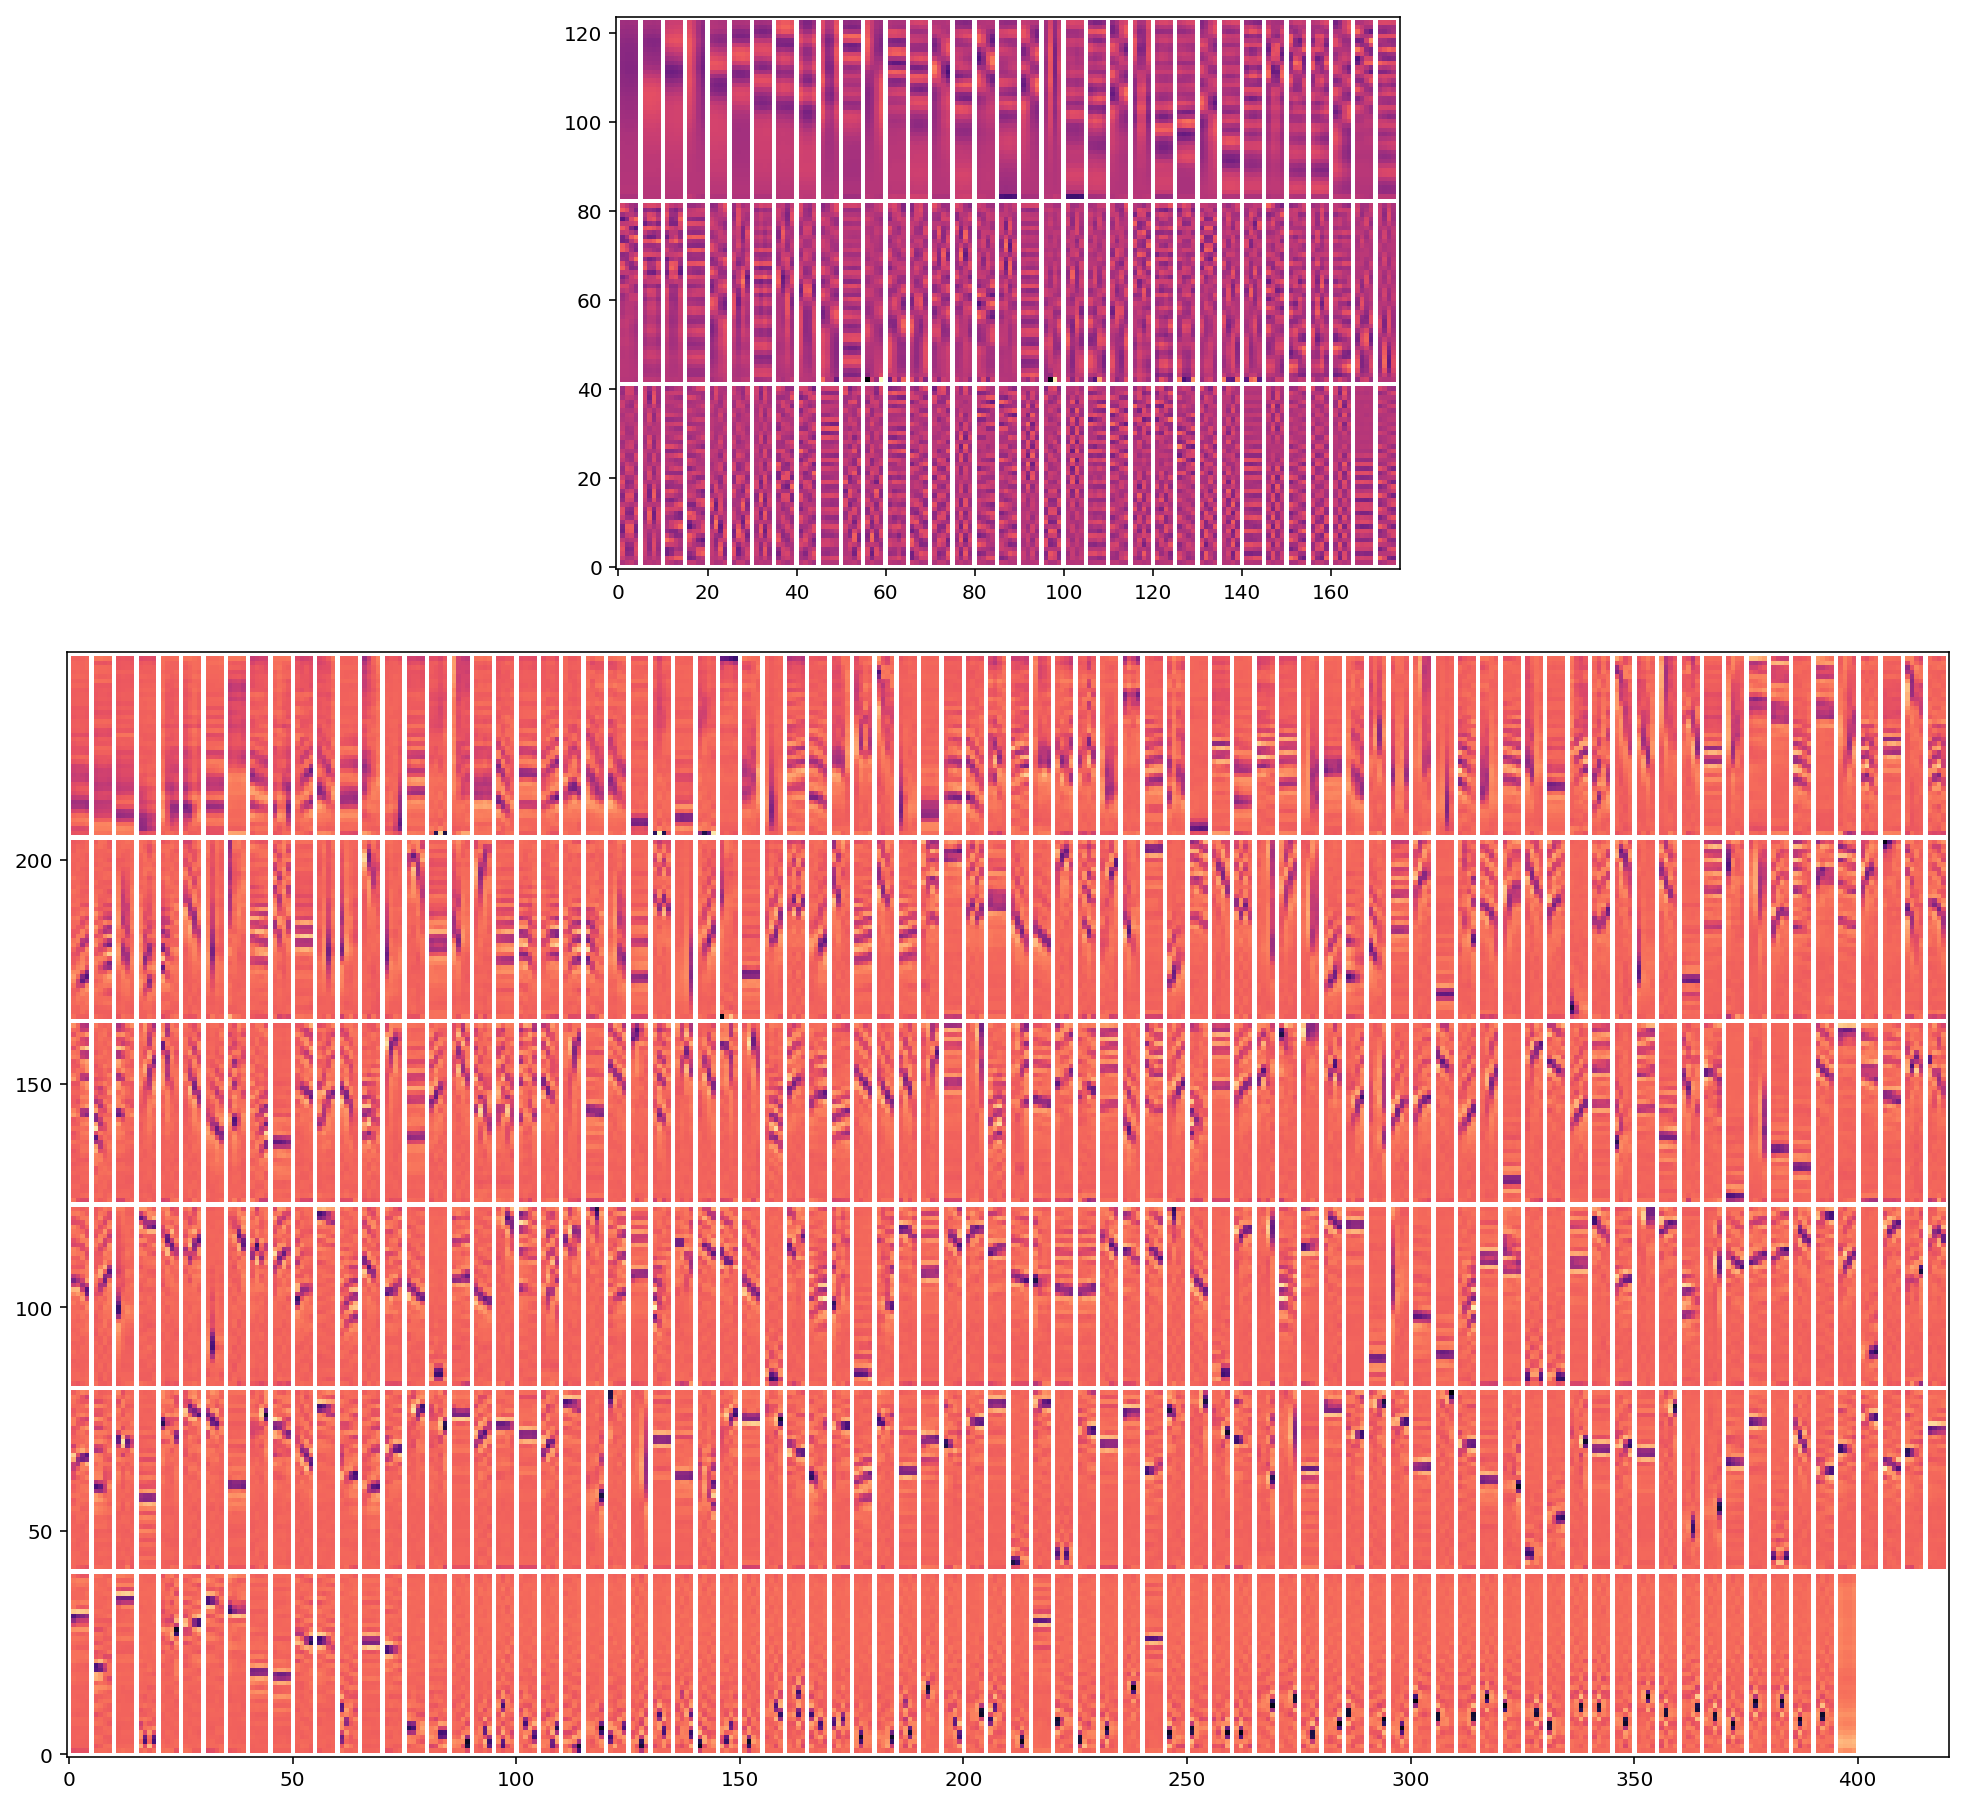

In [ ]:
# QA
pca_rows = 3
centroid_rows = 6
with with_figsize('full'):
    gs = mpl.gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 2], hspace=.1)
    plt.subplot(gs[0, 0])
    projection.plot_patches(projection.skm_.pca.components_.T, rows=pca_rows)
    plt.subplot(gs[1, 0])
    projection.plot_proj_centroids(rows=centroid_rows, sort=dict(reverse=True, key=lambda patch: (
        # patch.reshape(f, p).mean(axis=1).argmax()  # Freq mode
        # patch.std()  # Less useful than .sum()
        patch.sum()  # Spread (via total energy, which happens to correlate)
    )))
    plt.show()

In [ ]:
projection.save('peterson-v0')